<a href="https://colab.research.google.com/github/Hyro9533/sharing-code/blob/main/Equation_Diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TP Outils Logiciels 2**

*Régime Variable*

---

Edité par MONTGUILLON Jonathan TP4.

<img src = "http://www.stillincontact.com/images/ecoles/10792.jpg">

I. **Préparation du Projet**

```markdown
>> Importations de librairies communes au projet.
```

In [ ]:
!apt-get install python-scipy
from scipy.integrate import solve_ivp
from scipy import misc 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python-decorator python-olefile python-pil
Suggested packages:
  python-pil-doc python-pil-dbg python-scipy-doc
The following NEW packages will be installed:
  python-decorator python-olefile python-pil python-scipy
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.0 MB of archives.
After this operation, 43.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-decorator all 4.1.2-1 [9,300 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-olefile all 0.45.1-1 [33.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 python-pil amd64 5.1.0-1ubuntu0.7 [303 kB]
Get:4 http://archive.ubuntu.com/u

In [ ]:
#Installation d'une librairie d'affichage en couleur au niveau du terminal.
!pip install colorama
import colorama
from colorama import init, Fore, Back, Style

''' 
Fore: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
Back: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
Style: DIM, NORMAL, BRIGHT, RESET_ALL
'''

#Installation de librairies mathématiques



import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


```markdown
>> Définitions de fonctions communes au projet, non essentiel aux exercices demandés.
```

In [ ]:
#Déifiniton de plusieurs fonctions qui permettent une optimisation du projet.

def jumpPrinter(loop,reset):
    if reset:
        resetPrinter()
    for k in range(loop):
        print("\n")
    return 

def resetPrinter():
    return print(Style.RESET_ALL)

def isfloat(value): 
    try: 
        float(value) 
        return True 
    except ValueError: 
        return False

---
---
---
---
---

```markdown
>> Définitions d'un circuit RC.
```

<img src = "https://www.methodephysique.fr/circuit_RC.jpg"> 





```
>> Définitions des caractéristiques de dipôle 
```
$$
U_r(t) = R*i(t)
$$
$$
U_c(t) = \frac{1}{C}\int i_c(t) \;dt
$$
$$
I_c(t) = C*\frac{du_c(t)}{dt}
$$


```
>> Définition de la loi des Mailles 
```

$$
e(t) = U_r(t) + U_c(t)
$$

```markdown
>> On cherche une équation différentielle entre e(t) et U_c(t), qui deviendra Vs(t)
```

Ce qui nous donne :

$$
e(t) = R*i(t) + U_c(t)
$$

Or i(t) est constant sur le circuit car parralèle, définissons i(t) avec notre condensateur.

$$
e(t) = R*(C*\frac{du_c(t)}{dt}) + U_c(t)
$$

$$
e(t) = RC*\frac{du_c(t)}{dt} + U_c(t)
$$

Equivalent à :   

$$
e(t) = RC*\frac{dVs(t)}{dt} + Vs(t)
$$

Nous avons bien une équation de la forme :     

$$
e(t) = a*\frac{ds(t)}{dt} + b*s(t)
$$

Avec a = RC, B = 1. Ainsi τ = a = RC

```markdown
>> Définition d'une fonction pour la valeur du générateur.
```

In [ ]:
valueOfG = "IS NOT DEFINED"

def queryGeneratorVoltage():

    generator = 'IS NOT DEFINED'

    print(Back.RED + Fore.WHITE + "Merci d'entrer un entier ou float positif, pour les variables suivantes !")
    jumpPrinter(1,True)
    print(Back.BLACK)

    while( (isfloat(generator) == False) ):
        generator = (input("- Entrez la valeur du générateur e(t) en V : "))
    generator = float(generator)

    jumpPrinter(2,True)

    return generator

```markdown
>> Définition d'une fonction pour les valeurs de dipôles.
```

In [ ]:
valueOfR = "IS NOT DEFINED"
valueOfC = "IS NOT DEFINED"
valueOfL = "IS NOT DEFINED"

def queryDipole(Resistor_Emmit, Capacity_Emmit, Inductor_Emmit):
    
    Resistor = 'IS NOT DEFINED'
    Capacity = 'IS NOT DEFINED'
    Inductor = 'IS NOT DEFINED'

    print(Back.RED + Fore.WHITE + "Merci d'entrer un entier ou float positif, pour les variables suivantes !")
    jumpPrinter(1,True)
    print(Back.BLACK)

    if(Resistor_Emmit) : 
    
        while( (isfloat(Resistor) == False) ):
            Resistor = (input("- Entrez la valeur de la résistance (R) en Ω : "))
        Resistor = float(Resistor)

    if(Capacity_Emmit) : 
    
        while( (isfloat(Capacity) == False) ):
            Capacity = (input("- Entrez la valeur du condensateur (C) en nF: "))
        Capacity = float(Capacity)

    if(Inductor_Emmit) : 
    
        while( (isfloat(Inductor) == False) ):
            Inductor = (input("- Entrez la valeur de l'inductance (L) en mH: "))
        Inductor = float(Inductor)


    jumpPrinter(2,True)
  

    if(Resistor_Emmit & Capacity_Emmit & Inductor_Emmit ) :
        return  Resistor, Capacity, Inductor

    elif (Resistor_Emmit & Capacity_Emmit):
        return Resistor,Capacity

    elif (Resistor_Emmit & Inductor_Emmit ):
        return Resistor,Inductor

    elif (Capacity_Emmit & Inductor_Emmit):
        return Capacity,Inductor

    elif Capacity_Emmit:
        return Capacity

    elif Inductor_Emmit:
        return Inductor

    elif Resistor_Emmit:
        return Resistor

    else:
        print("Error")


```markdown
>> Définition d'une fonction pour les conditions initiales
```

In [ ]:
t0 = "IS NOT DEFINED"
tf = "IS NOT DEFINED"
VO = "IS NOT DEFINED"



def initialTime():

    print(Back.RED + Fore.WHITE + "Merci d'entrer un entier ou float positif, pour la variable suivante !")
    jumpPrinter(1,True)
    print(Back.BLACK)

    initialTime = "IS NOT DEFINED"

    while( (isfloat(initialTime) == False) ):
        initialTime = (input("- Entrez la valeur du temps à l'instant t0 en s : "))
    initialTime = float(initialTime)

    jumpPrinter(2,True)

    return initialTime


def initialGenerator():

    print(Back.RED + Fore.WHITE + "Merci d'entrer un entier ou float positif, pour la variable suivante !")
    jumpPrinter(1,True)
    print(Back.BLACK)

    initialGenerator = "IS NOT DEFINED"

   
    while( (isfloat(initialGenerator) == False) ):
        initialGenerator = (input("- Entrez la valeur de la tension de sortie qui équivaut à la tension d'entrée à t0 en V : "))
    initialGenerator = float(initialGenerator)

    jumpPrinter(2,True)

    return initialGenerator

def endTime():

    print(Back.RED + Fore.WHITE + "Merci d'entrer un entier ou float positif, pour la variable suivante !")
    jumpPrinter(1,True)
    print(Back.BLACK)

    endTime = "IS NOT DEFINED"

    print("Il faut impérativement définir un temps final pour que le calcul soit effecter par la machine, une valeur infinie est impossible pour lui à calculer.")
    print("0.001 secondes permet de voir l'effet sur le graph")

    while( (isfloat(endTime) == False) ):
        endTime = (input("- Entrez la valeur du temps à l'instant tf en s : "))
    endTime = float(endTime)

    jumpPrinter(2,True)

    return endTime

```markdown
>> Appel des fonctions -- Paramètrage.
```

In [ ]:
valueOfR, valueOfC = queryDipole(True,True,False)

jumpPrinter(2,True)
print(Style.BRIGHT + Fore.YELLOW + "Les dipôles sont respectivement : ",valueOfR," Ω & ",valueOfC," nF.")
resetPrinter() 

Merci d'entrer un entier ou float positif, pour les variables suivantes !




- Entrez la valeur de la résistance (R) en Ω : 10000
- Entrez la valeur du condensateur (C) en nF: 15










Les dipôles sont respectivement :  10000.0  Ω &  15.0  nF.



In [ ]:
valueOfG = queryGeneratorVoltage()
jumpPrinter(2,True)
print(Style.BRIGHT + Fore.YELLOW + "La tension du générateur est de : ",valueOfG," V.")
resetPrinter() 

Merci d'entrer un entier ou float positif, pour les variables suivantes !




- Entrez la valeur du générateur e(t) en V : 5










La tension du générateur est de :  5.0  V.



In [ ]:
t0,tf,VO = initialTime(),endTime(),initialGenerator()

jumpPrinter(2,True)
print(Style.BRIGHT + Fore.YELLOW + "Les valeurs sont respectivement : ",t0," s, ",tf," s & ",VO," V.")
resetPrinter() 

Merci d'entrer un entier ou float positif, pour la variable suivante !




- Entrez la valeur du temps à l'instant t0 en s : 0





Merci d'entrer un entier ou float positif, pour la variable suivante !




Il faut impérativement définir un temps final pour que le calcul soit effecter par la machine, une valeur infinie est impossible pour lui à calculer.
0.001 secondes permet de voir l'effet sur le graph
- Entrez la valeur du temps à l'instant tf en s : 0.001





Merci d'entrer un entier ou float positif, pour la variable suivante !




- Entrez la valeur de la tension de sortie qui équivaut à la tension d'entrée à t0 en V : 0










Les valeurs sont respectivement :  0.0  s,  0.001  s &  0.0  V.



II - Méthode Numérique

Pour les besoins du calcul suivants, il nous faut séparer la dérivé des autres fonction, ce qui nous donne :           

$$
e(t) = RC*\frac{dVs(t)}{dt} + Vs(t)
$$

$$
e(t) - Vs(t)= RC*\frac{dVs(t)}{dt} 
$$

$$
\frac{e(t) - Vs(t)}{RC} = \frac{dVs(t)}{dt} 
$$

In [ ]:
print("R (Ω): ",valueOfR," & C (nF) :",valueOfC)

print("t0 (s) :",t0," & tf (s) :",tf," & VO (V) : ",VO)

def e():
    return valueOfG

def equation_Diff(t,vs):
    return (5-vs)/(valueOfR* (valueOfC*10**-9) )

tension = solve_ivp(equation_Diff, [t0, tf], [VO])

print(tension)

R (Ω):  10000.0  & C (nF) : 15.0
t0 (s) : 0.0  & tf (s) : 0.001  & VO (V) :  0.0
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 2.15902961e-04, 3.59687640e-04,
       5.31205465e-04, 7.39018063e-04, 9.96999179e-04, 1.00000000e-03])
 t_events: None
        y: array([[0.        , 2.43273891, 3.81428546, 4.54493464, 4.85447892,
        4.9630615 , 4.99285167, 4.99299325]])
 y_events: None


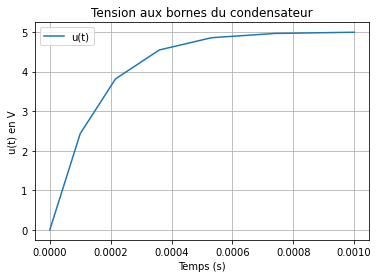

In [ ]:
import matplotlib.pyplot as plt

# Tracé de la tension aux bornes du condensateur
plt.plot(tension.t, tension.y[0], label="u(t)")
plt.ylabel('u(t) en V')
plt.xlabel("Temps (s)")
plt.title("Tension aux bornes du condensateur")
plt.grid(which="both")
plt.legend()
plt.show()

III- Méthode Pratique

```markdown
>> Reprenons nos calculs
```


$$
e(t) = RC*\frac{dVs(t)}{dt} + Vs(t)
$$

Résoudons l'équations sans second membre 

$$
V_{sg}(t) = K*e^\frac{-t}{RC} 
$$



Résoudons l'équation particulière avec e(t) = 5V :

$$
V_{sp}(t) = \frac{cst}{b} 
$$

b = 1 donc :

$$
V_{sp}(t) = cst
$$

Injectons : 

$$
e(t) = RC*\frac{dV_{sp}(t)}{dt} + V_{sp}(t) 
$$

$$
e(t) = RC*\frac{dcst}{dt} + cst 
$$

Ce qui nous donne :

$$
e(t) = cst
$$

$$
V_{sp}(t) = 5
$$

Soit la solution final : 

$$
V_{sf}(t) = K*e^\frac{-t}{RC} + 5 
$$



Admettons désormais que à t0, Vo = 0V comme condtion initiale ( Vs(0) = 0) : 

$$
V_{sf}(t) = K*e^\frac{-t}{RC} + 5 
$$

$$
0 = K*e^\frac{-0}{RC} + 5 
$$

$$
0 = K*e^0 + 5 
$$

$$
0 = K + 5 
$$

$$
K = - 5 
$$

Ce qui nous donne :  

$$
V_{s}(t) = 5*(-e^\frac{-t}{RC} + 1) 
$$

$$
V'_{s}(t) = \frac{5}{RC}*e^\frac{-t}{RC} 
$$

Tangeante :     

$$
f'(a)(x-a)+f(a)
$$

Prenons x(0,0) & y(RC,e(t)) :

$$
\frac{yb-ya}{xb-xa}(t-a)+ya
$$


$$
f(0) = \frac{5-0}{τ-0}(t-0)+0
$$

$$
f(0) = \frac{5}{RC}*t
$$

```markdown
>> Calcul des fonctions associées, de sa dérivé, et de ses valeurs en 5 points
```

In [ ]:
τ = valueOfR * valueOfC*10**-9

t = sp.Symbol('t')

def function(t):
    return 5*( -sp.exp(-t/(τ) ) + 1 )

functionDerivate = sp.diff(function(t),t)

functionLimit = sp.limit(function(t), t, sym.oo)


print(Style.BRIGHT + Fore.YELLOW + "Function : ",function(t))

print("Dérivée : ",functionDerivate)

print("Limite : ",functionLimit)

jumpPrinter(2,True)

print(Style.BRIGHT + Fore.MAGENTA +"Tension :")
print("En f(0) : ", function(0), " V.")
print("En f(τ) : ", function(τ), " V.")
print("En f(3*τ) : ", function(3*τ), " V.")
print("En f(5*τ) : ", function(5*τ), " V.")
print("En f(10*τ) : ", function(10*τ), " V.")
jumpPrinter(1,True)


print(Style.BRIGHT + Fore.RED +"Temps :")
print("En f(0) : ", (0), " s.")
print("En f(τ) : ", (τ), " s.")
print("En f(3*τ) : ", (3*τ), " s.")
print("En f(5*τ) : ", (5*τ), " s.")
print("En f(10*τ) : ", (10*τ), " s.")



Function :  5 - 5*exp(-6666.66666666667*t)
Dérivée :  33333.3333333333*exp(-6666.66666666667*t)
Limite :  5





Tension :
En f(0) :  0  V.
En f(τ) :  3.16060279414279  V.
En f(3*τ) :  4.75106465816068  V.
En f(5*τ) :  4.96631026500457  V.
En f(10*τ) :  4.99977300035119  V.



Temps :
En f(0) :  0  s.
En f(τ) :  0.00015000000000000001  s.
En f(3*τ) :  0.00045000000000000004  s.
En f(5*τ) :  0.00075  s.
En f(10*τ) :  0.0015  s.


```markdown
>> Tracé du graphique et de ses paramètres
```

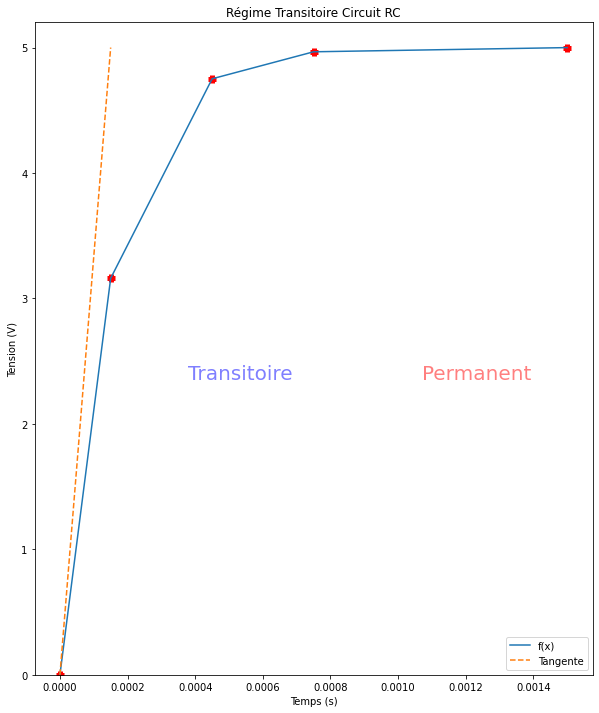

In [ ]:

plt.title("Régime Transitoire Circuit RC") # mettre un titre à la figure
x = np.array([0, τ, 3*τ, 5*τ, 10*τ], dtype=float)
y = np.array([function(0), function(τ), function(3*τ), function(5*τ) , function(10*τ)], dtype=float)

plt.scatter(0, function(0), s = 50, c = 'red', marker = '+', linewidth = 5)
plt.scatter(τ, function(τ), s = 50, c = 'red', marker = '+', linewidth = 5)
plt.scatter(3*τ, function(3*τ), s = 50, c = 'red', marker = '+', linewidth = 5)
plt.scatter(5*τ, function(5*τ), s = 50, c = 'red', marker = '+', linewidth = 5)
plt.scatter(10*τ, function(10*τ), s = 50, c = 'red', marker = '+', linewidth = 5)

plt.ylim(0,5.2)

plt.text(0.40,1.2 , 'Transitoire', alpha=0.5, fontsize=20, color = 'b',transform=ax.transAxes)
plt.text(1.10,1.2 , 'Permanent', alpha=0.5, fontsize=20, color = 'r',transform=ax.transAxes)

plt.plot(x, y)

w = np.array([0, τ])
z = np.array([0, 5])

plt.plot(w, z,linestyle="dashed")

plt.xlabel("Temps (s)") # mettre un nom à l’axe des abscisses
plt.ylabel("Tension (V)") # mettre un nom à l’axe des ordonn ées
plt.legend(["f(x)", "Tangente"]) # donne une lé gende au graphique


plt.rcParams["figure.figsize"] = (10, 12)
plt.show()

```markdown
>> Affichage des résultats
```

In [ ]:
print(" _________________________________")
print("|   t    |    s    |   U   |   %  |")
print("|---------------------------------|")
print("| À 0*τ  | 0.00000 | 0.00  | 0.00 |")
print("| À 1*τ  | 0.00010 | 3.16  | 63.2 |")
print("| À 3*τ  | 0.00040 | 4.75  | 95.0 |")
print("| À 5*τ  | 0.00075 | 4.96  | 99.2 |")
print("|_________________________________|")



 _________________________________
|   t    |    s    |   U   |   %  |
|---------------------------------|
| À 0*τ  | 0.00000 | 0.00  | 0.00 |
| À 1*τ  | 0.00010 | 3.16  | 63.2 |
| À 3*τ  | 0.00040 | 4.75  | 95.0 |
| À 5*τ  | 0.00075 | 4.96  | 99.2 |
| À 10*τ | 0.00150 | 4.99  | 99.8 |
|_________________________________|


```markdown
>> Equation de la tangante
```

In [ ]:
y = [τ,5]
x = [0,0]
#f'(a)(x-a) + f(a)
tangeante = ( ( y[1] - x[1] ) / ( y[0] - x[0] ) ) * (t-0) + 0

print(tangeante)

33333.3333333333*t
